In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Parameter selection, Validation, and Testing
Most models have parameters that influence how complex a model they can learn. Remember using KNeighborsRegressor. If we change the number of neighbors we consider, we get a smoother and smoother prediction:

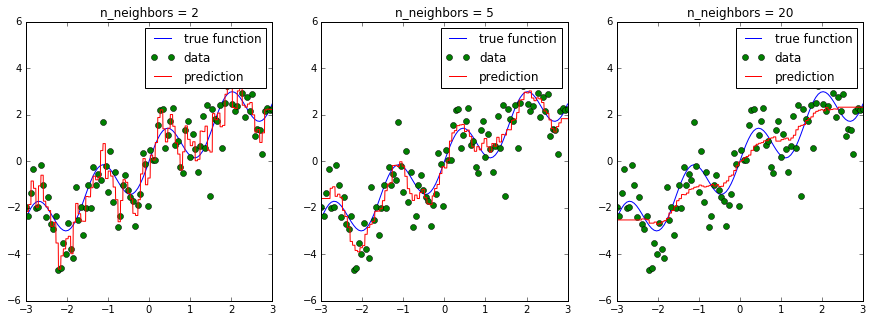


# Hyperparameters, Over-fitting, and Under-fitting
Unfortunately, there is no general rule how to find the sweet spot, and so machine learning practitioners have to find the best trade-off of model-complexity and generalization by trying several hyperparameter settings. Hyperparameters are the internal knobs or tuning parameters of a machine learning algorithm (in contrast to model parameters that the algorithm learns from the training data -- for example, the weight coefficients of a linear regression model); the number of k in K-nearest neighbors is such a hyperparameter.

Most commonly this "hyperparameter tuning" is done using a brute force search, for example over multiple values of `n_neighbors`:

n_neighbors: 1,
	scores: [0.3698749  0.68900324 0.76824672 0.37046138 0.39570494], 
	average score: 0.518658
n_neighbors: 3,
	scores: [0.41847662 0.6873437  0.80338796 0.71240937 0.75447671], 
	average score: 0.675219
n_neighbors: 5,
	scores: [0.77184442 0.84227495 0.71694716 0.633701   0.83446889], 
	average score: 0.759847
n_neighbors: 10,
	scores: [0.74498647 0.72709791 0.75160549 0.74833455 0.70148905], 
	average score: 0.734703
n_neighbors: 20,
	scores: [0.73576349 0.63039345 0.70298367 0.66115218 0.46322245], 
	average score: 0.638703


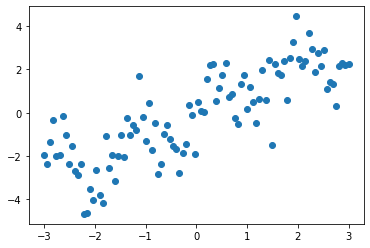

In [12]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor
# generate toy dataset:
x = np.linspace(-3, 3, 100)
rng = np.random.RandomState(42)
y = np.sin(4 * x) + x + rng.normal(size=len(x))
X = x[:, np.newaxis]

plt.plot(X, y, 'o')

cv = KFold(shuffle=True)

# for each parameter setting do cross-validation:
for n_neighbors in [1, 3, 5, 10, 20]:
    scores = cross_val_score(KNeighborsRegressor(n_neighbors=n_neighbors), X, y, cv=cv)
    print("n_neighbors: %d,\n\tscores: %s, \n\taverage score: %f" % (n_neighbors, scores, np.mean(scores)))

There is a function in scikit-learn, called `validation_plot` to reproduce the cartoon figure above. It plots one parameter, such as the number of neighbors, against training and validation error (using cross-validation):

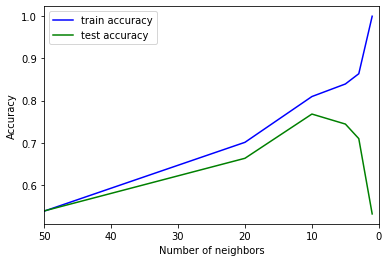

In [7]:
from sklearn.model_selection import validation_curve
n_neighbors = [1, 3, 5, 10, 20, 50]
train_scores, test_scores = validation_curve(KNeighborsRegressor(), X, y, param_name="n_neighbors", param_range=n_neighbors, cv=cv)
plt.plot(n_neighbors, train_scores.mean(axis=1), 'b', label="train accuracy")
plt.plot(n_neighbors, test_scores.mean(axis=1), 'g', label="test accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Number of neighbors')
plt.xlim([50, 0])
plt.legend(loc="best");

<div class="alert alert-warning">
    <p>Note that many neighbors mean a "smooth" or "simple" model, so the plot uses a reverted x axis.</p>
</div>

If multiple parameters are important, like the parameters C and gamma in an SVM, all possible combinations are tried:

In [13]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVR

# each parameter setting do cross-validation:
for C in [0.001, 0.01, 0.1, 1, 10]:
    for gamma in [0.001, 0.01, 0.1, 1]:
        scores = cross_val_score(SVR(C=C, gamma=gamma), X, y, cv=cv)
        print("C: %f, gamma: %f, average score: %f" % (C, gamma, np.mean(scores)))

C: 0.001000, gamma: 0.001000, average score: -0.020279
C: 0.001000, gamma: 0.010000, average score: -0.070622
C: 0.001000, gamma: 0.100000, average score: -0.007296
C: 0.001000, gamma: 1.000000, average score: -0.264898
C: 0.010000, gamma: 0.001000, average score: -0.026686
C: 0.010000, gamma: 0.010000, average score: 0.006602
C: 0.010000, gamma: 0.100000, average score: 0.108643
C: 0.010000, gamma: 1.000000, average score: 0.055339
C: 0.100000, gamma: 0.001000, average score: -0.002770
C: 0.100000, gamma: 0.010000, average score: -0.084930
C: 0.100000, gamma: 0.100000, average score: 0.543221
C: 0.100000, gamma: 1.000000, average score: 0.518161
C: 1.000000, gamma: 0.001000, average score: 0.174811
C: 1.000000, gamma: 0.010000, average score: 0.536241
C: 1.000000, gamma: 0.100000, average score: 0.620315
C: 1.000000, gamma: 1.000000, average score: 0.687732
C: 10.000000, gamma: 0.001000, average score: 0.568420
C: 10.000000, gamma: 0.010000, average score: 0.620026
C: 10.000000, gamma

As this is such a very common pattern, there is a built-in class for this in scikit-learn, GridSearchCV. GridSearchCV takes a dictionary that describes the parameters that should be tried and a model to train.

The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested.